In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
dataset = pd.read_csv("../data/assignment_preprocessed.csv")

In [3]:
dataset.shape

(9860, 54)

In [4]:
dataset.head(10)

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom,price_per_sqm,decade
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,-1,-1,-1,-1,-1,-1,-1,-1,352.73,2000
1,43018583,134.7,15502.0,northern sub,642,550000,1992,ground-floor,detached,5,...,0,1,1,0,0,1,0,1,856.70,1990
2,39670968,71.0,9807.0,northern sub,320,500000,2009,ground-floor,detached,2,...,-1,1,-1,-1,-1,-1,-1,-1,1562.50,2000
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,0,1,1,0,0,0,0,0,2421.05,2000
4,36078547,116.5,8906.0,northern sub,291,970000,2010,ground-floor,maisonette,3,...,0,1,1,0,0,0,0,1,3333.33,2010
5,36152206,154.5,8123.0,northern sub,400,850000,2008,ground-floor,detached,6,...,0,1,1,1,1,1,1,1,2125.00,2000
6,43045884,27.8,11545.0,northern sub,583,220000,2155,ground-floor,detached,0,...,-1,-1,-1,-1,-1,-1,-1,-1,377.36,2150
7,42932512,160.5,8855.0,northern sub,440,1050000,1994,ground-floor,detached,4,...,0,1,1,0,1,0,1,1,2386.36,1990
8,43208870,124.8,11210.0,northern sub,300,550000,1993,ground-floor,detached,5,...,0,1,0,0,0,0,0,0,1833.33,1990
9,42301798,159.7,8855.0,northern sub,330,500000,2010,ground-floor,maisonette,3,...,0,1,0,0,1,0,0,1,1515.15,2010


# Creating a new subset
First we need to create a new subset based on our dataset using the columns of interest. In this case : 


```
columns_of_interest = ['year_of_construction', 'subtype', 'price', 'sq_meters', 'geography_name']
```

Then we need to create two new columns.
1. **Price per Square Meter** 
```
price_per_sqm = price / sq_meters
```
2. **Decade**
```
decade = year / (year%10)
```

In [5]:
columns_of_interest = ['year_of_construction', 'subtype', 'price', 'sq_meters', 'geography_name', 'price_per_sqm', 'decade']
subset = dataset[columns_of_interest].copy()

In [6]:
subset.head(3)

,year_of_construction,subtype,price,sq_meters,geography_name,price_per_sqm,decade
0,2005,apartment,200000,567,northern sub,352.73,2000
1,1992,detached,550000,642,northern sub,856.70,1990
2,2009,detached,500000,320,northern sub,1562.50,2000


In [7]:
def get_visualization(dataset, to_groupby):
    ax = dataset[to_groupby].value_counts().plot.barh(figsize=(8, 8))
    ax.bar_label(ax.containers[0])
    plt.xlabel("count", labelpad=12)
    plt.ylabel(to_groupby, labelpad=12)
    plt.title('Amount of elements per category of '+ to_groupby, y=1.02)
    plt.show()

In [8]:
def get_min_max_mean(grouped_dataset, find_stats_of='price_per_sqm'):
    
    max_grouped = grouped_dataset.max()[find_stats_of]
    min_grouped =  grouped_dataset.min()[find_stats_of]
    mean_grouped = grouped_dataset.mean(numeric_only=True)[find_stats_of]
    print('**', max_grouped.idxmax(), '** has the highest maximum **', find_stats_of, '** value: ', max_grouped.max())
    print('**', min_grouped.idxmin(), '** has the lowest minimum **', find_stats_of, '** value: ', min_grouped.min())  
    
    print('**', mean_grouped.idxmax(), '** has the highest mean**', find_stats_of, '** value: ', round(mean_grouped.max(), 2))
    print('**', mean_grouped.idxmin(), '** has the lowest mean **', find_stats_of, '** value: ', round(mean_grouped.min(), 2))  
    

In [9]:
def stats(dataset, to_groupby='subtype', find_stats_of='price_per_sqm'):
    print('Price per square meter per', to_groupby)
    display(dataset.groupby(to_groupby, as_index=False)
                   .agg({find_stats_of:['count', 'min', 'max', 'mean', 'median', 'std']}))
    
    get_min_max_mean(dataset.groupby(to_groupby), find_stats_of)

### Price per sqm Statistics


<Axes: xlabel='price_per_sqm', ylabel='Count'>

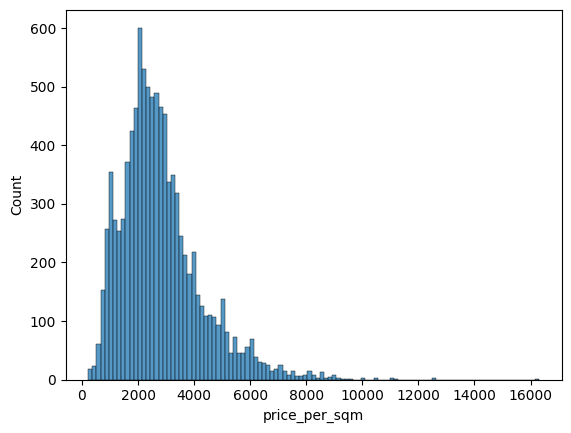

In [10]:
sns.histplot(subset['price_per_sqm'])

**per subtype**

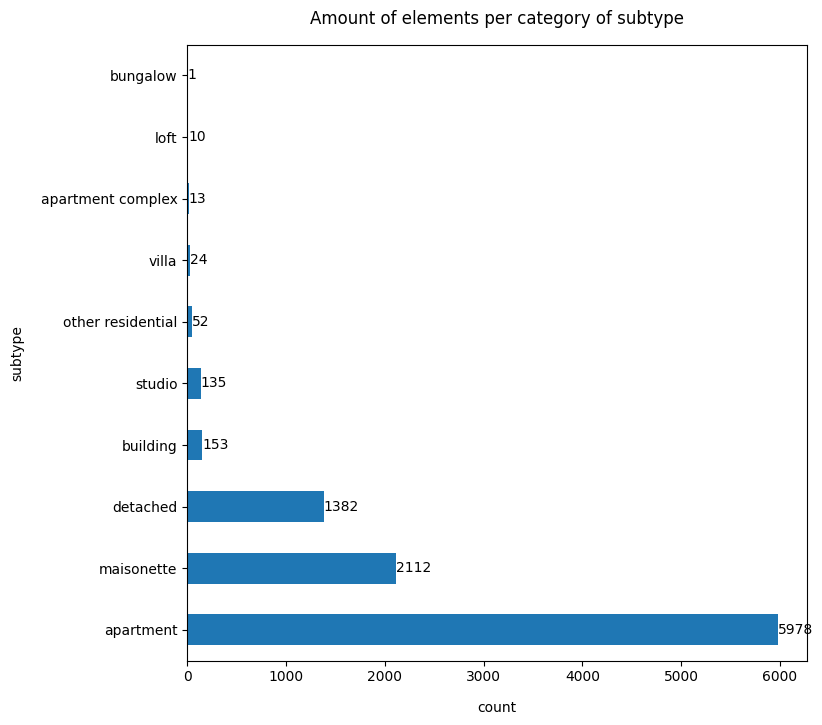

In [11]:
get_visualization(dataset, 'subtype')

In [12]:
stats(subset, 'subtype', 'price_per_sqm')

Price per square meter per subtype


subtype price_per_sqm                                            \
                             count      min       max         mean    median   
0          apartment          5978   222.22  11250.00  2729.336114  2560.000   
1  apartment complex            13   600.00   5333.33  2518.460769  2363.640   
2           building           153   317.46   5892.86  1895.435229  1666.670   
3           bungalow             1  2266.67   2266.67  2266.670000  2266.670   
4           detached          1382   250.00  16304.35  2867.854537  2543.910   
5               loft            10  2325.58   6211.18  4033.432000  4279.850   
6         maisonette          2112   806.45  10416.67  3103.957462  2647.060   
7  other residential            52   649.35  10000.00  2834.297115  2313.725   
8             studio           135   300.00   4545.45  1696.931778  1562.500   
9              villa            24  1121.37   5434.78  2521.902917  2355.815   

                
           std  
0  1381.909653  
1  1244.869215  
2  1047.442035  
3          NaN  
4  1547.718951  
5  1308.357764  
6  1509.819684  
7  1836.150674  
8   979.148275  
9  1151.104218

** detached ** has the highest maximum ** price_per_sqm ** value:  16304.35
** apartment ** has the lowest minimum ** price_per_sqm ** value:  222.22
** loft ** has the highest mean** price_per_sqm ** value:  4033.43
** studio ** has the lowest mean ** price_per_sqm ** value:  1696.93


**per geography_name**

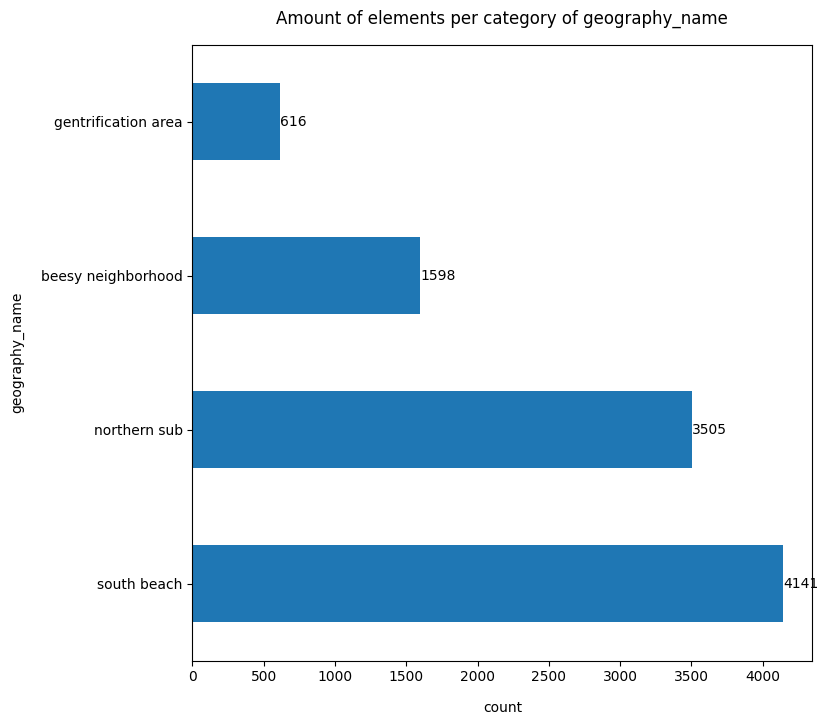

In [13]:
get_visualization(dataset, 'geography_name')

In [14]:
stats(subset, 'geography_name', 'price_per_sqm')

Price per square meter per geography_name


geography_name price_per_sqm                                          \
                               count     min       max         mean   median   
0   beesy neighborhood          1598  222.22   5405.41  1283.130801  1128.62   
1  gentrification area           616  625.00   8800.00  2586.162971  2500.00   
2         northern sub          3505  250.00  12500.00  2698.989521  2406.02   
3          south beach          4141  625.00  16304.35  3509.723308  3176.47   

                
           std  
0   548.323592  
1   854.570921  
2  1174.296402  
3  1475.848270

** south beach ** has the highest maximum ** price_per_sqm ** value:  16304.35
** beesy neighborhood ** has the lowest minimum ** price_per_sqm ** value:  222.22
** south beach ** has the highest mean** price_per_sqm ** value:  3509.72
** beesy neighborhood ** has the lowest mean ** price_per_sqm ** value:  1283.13


**decade**

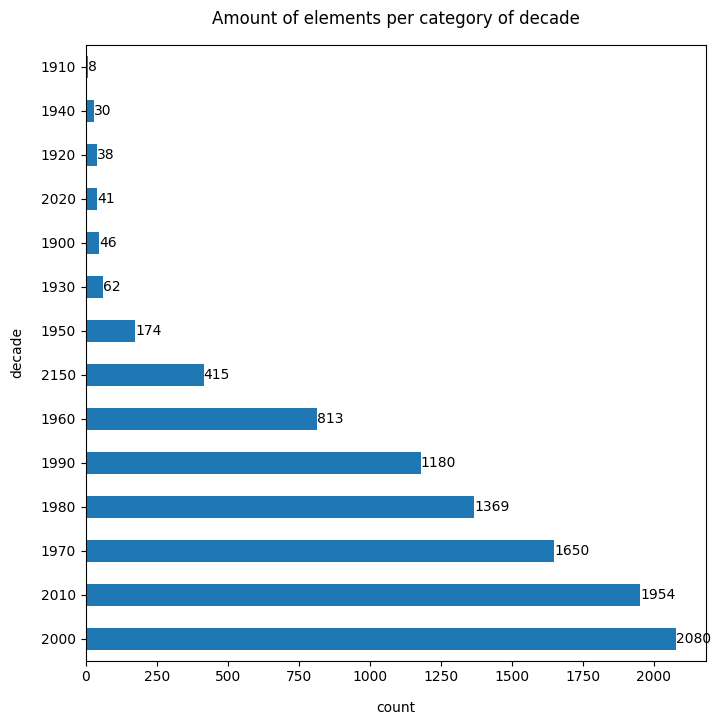

In [15]:
get_visualization(dataset, 'decade')

In [16]:
stats(subset, 'decade', 'price_per_sqm')

Price per square meter per decade


decade price_per_sqm                                                       
                  count      min       max         mean    median          std
0    1900            46   764.71   6250.00  2892.911087  2663.980  1596.534644
1    1910             8   933.33   6250.00  2978.532500  2823.595  1718.631652
2    1920            38   769.23   8571.43  3330.943421  1932.835  2343.779270
3    1930            62   605.26  11111.11  2544.514516  1503.840  2460.305881
4    1940            30   588.24   7058.82  2182.934667  1702.635  1585.654323
5    1950           174   407.41  11111.11  2028.847874  1427.350  1617.097143
6    1960           813   264.71  12500.00  1735.677798  1230.770  1220.716851
7    1970          1650   222.22   8571.43  2070.724497  1888.890  1095.528891
8    1980          1369   450.00  12500.00  2495.663930  2363.640   978.343459
9    1990          1180   250.00   9473.68  2688.367034  2500.000   989.313385
10   2000          2080   317.46   9565.22  2978.434231  2783.060  1172.711592
11   2010          1954   849.06  11250.00  3751.854667  3371.430  1591.472245
12   2020            41  2586.21   7220.22  4551.226341  4461.540  1257.617939
13   2150           415   353.98  16304.35  3971.061253  3823.530  1736.882729

** 2150 ** has the highest maximum ** price_per_sqm ** value:  16304.35
** 1970 ** has the lowest minimum ** price_per_sqm ** value:  222.22
** 2020 ** has the highest mean** price_per_sqm ** value:  4551.23
** 1960 ** has the lowest mean ** price_per_sqm ** value:  1735.68


**Group by multiple**

In [17]:
stats(subset, ['subtype','decade', 'geography_name'], 'price_per_sqm')

Price per square meter per ['subtype', 'decade', 'geography_name']


subtype decade       geography_name price_per_sqm                    \
                                                   count      min      max   
0    apartment   1900   beesy neighborhood             7   764.71  1560.00   
1    apartment   1900  gentrification area             6  1696.43  3000.00   
2    apartment   1900         northern sub             4  1500.00  3225.81   
3    apartment   1900          south beach             8  1800.00  6181.82   
4    apartment   1920   beesy neighborhood             5   805.69  1505.38   
..         ...    ...                  ...           ...      ...      ...   
207      villa   2000         northern sub             6  1333.33  2656.25   
208      villa   2000          south beach             5  3010.75  5434.78   
209      villa   2010         northern sub             1  2653.06  2653.06   
210      villa   2010          south beach             1  2200.00  2200.00   
211      villa   2150         northern sub             1  3194.44  3194.44   

                                         
            mean    median          std  
0    1043.695714  1041.670   303.005918  
1    2278.196667  2268.635   546.206369  
2    2191.870000  2020.835   731.913054  
3    3031.143750  2723.215  1335.950197  
4    1173.890000  1141.460   267.163575  
..           ...       ...          ...  
207  1930.291667  1961.540   484.507906  
208  4260.148000  4583.330   936.317377  
209  2653.060000  2653.060          NaN  
210  2200.000000  2200.000          NaN  
211  3194.440000  3194.440          NaN  

[212 rows x 9 columns]

** ('detached', 2150, 'south beach') ** has the highest maximum ** price_per_sqm ** value:  16304.35
** ('apartment', 1970, 'beesy neighborhood') ** has the lowest minimum ** price_per_sqm ** value:  222.22
** ('detached', 1930, 'south beach') ** has the highest mean** price_per_sqm ** value:  8172.51
** ('building', 2150, 'northern sub') ** has the lowest mean ** price_per_sqm ** value:  353.98


In [18]:
mean_listings = subset.groupby(['subtype','decade', 'geography_name']).mean(numeric_only=True)['price_per_sqm']

In [19]:
print('Top 10 most low-priced listing categories:')   
for i, (key, value) in enumerate(dict(mean_listings.nsmallest(10)).items()):
    print(i+1, '.', '-'.join(str(k) for k in key), ' : ', round(value, 2), '€')

Top 10 most low-priced listing categories:
1 . building-2150-northern sub  :  353.98 €
2 . apartment complex-1970-beesy neighborhood  :  600.0 €
3 . studio-1950-beesy neighborhood  :  768.06 €
4 . studio-1960-beesy neighborhood  :  810.78 €
5 . building-1990-northern sub  :  811.0 €
6 . detached-1910-beesy neighborhood  :  933.33 €
7 . building-1950-beesy neighborhood  :  974.4 €
8 . building-1930-beesy neighborhood  :  977.82 €
9 . building-1980-beesy neighborhood  :  988.51 €
10 . detached-2000-beesy neighborhood  :  1000.0 €


In [20]:
print('Top 10 most expensive listing categories:')
for i, (key, value) in enumerate(dict(mean_listings.nlargest(10)).items()):
    print(i+1, '.', '-'.join(str(k) for k in key), ': ', round(value, 2), '€')

Top 10 most expensive listing categories:
1 . detached-1930-south beach  :  8172.51 €
2 . detached-1920-south beach  :  6569.48 €
3 . maisonette-1960-northern sub  :  6000.0 €
4 . other residential-2010-northern sub  :  5893.42 €
5 . detached-1950-south beach  :  5561.39 €
6 . detached-1920-northern sub  :  5464.18 €
7 . apartment complex-2010-northern sub  :  5333.33 €
8 . maisonette-2020-south beach  :  5327.66 €
9 . detached-1910-northern sub  :  5312.5 €
10 . maisonette-1900-south beach  :  5297.3 €


In [21]:
subset['price_per_sqm'].corr(subset['geography_name'].astype('category').cat.codes)

0.5226402500523053

In [22]:
subset['price_per_sqm'].corr(subset['year_of_construction'].astype('category').cat.codes)

0.42107567816155744

In [23]:
subset['price_per_sqm'].corr(subset['decade'].astype('category').cat.codes)

0.4059213756071144

In [24]:
subset['price_per_sqm'].corr(subset['subtype'].astype('category').cat.codes)

0.0709656967198924